# Data Loading

In [12]:
from time import time
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

In [2]:
def load_data(dataset_path='./npy_files'):
    X = np.load(os.path.join(dataset_path,'X.npy'))
    y = np.load(os.path.join(dataset_path,'y.npy'))
    folds = np.load(os.path.join(dataset_path,'folds.npy'))
    feature_class = np.load(os.path.join(dataset_path, 'feature_class.npy'))
    facs = pd.read_csv('save_data/npy_files/facs_multi.csv',index_col=None)

    # rescale [0,255] -> [0,2]    
    X = X.astype('float32')/255*2


    return X, y, folds, feature_class, facs

In [3]:
X, y, folds, feature_class, facs = load_data('./save_data/npy_files/')
del facs['Unnamed: 0']
del facs['10']
del facs['26']
del facs['0']

In [4]:
feature_class_single = np.zeros((1307, 4040))
for index, inst in enumerate(feature_class):
    feature_class_single[index] = inst[0]

In [5]:
feature = np.zeros((1307, 4032))
for index, inst in enumerate(feature_class_single):
    feature[index] = inst[:-8]

# t-SNE

In [13]:
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(feature).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

t-SNE: 26 sec


In [15]:
type(trans_data)

numpy.ndarray

In [16]:
trans_data.shape

(2, 1307)

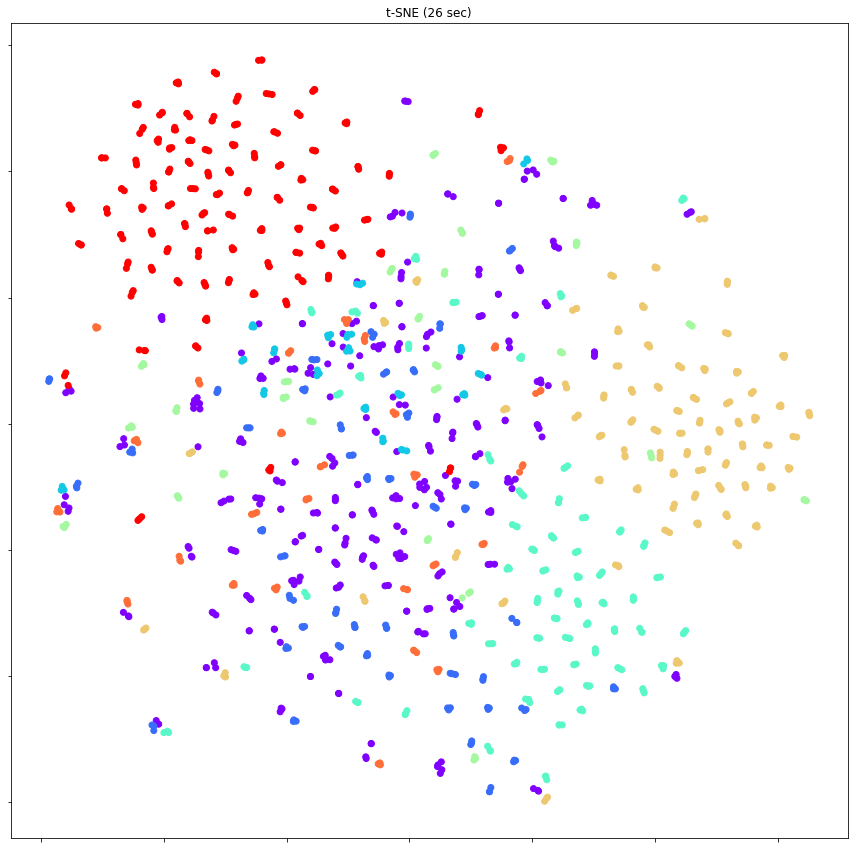

In [20]:
plt.figure(figsize=(15,15))
ax = plt.axes()
plt.scatter(trans_data[0], trans_data[1], c=y, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [44]:
emotion_list = ['Neutral', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sadness',
                          'Surprise', 'Contempt']

In [46]:
trans_data.shape

(2, 1307)

In [56]:
emotion_index_dict = {}

for index, emot in enumerate(y):
    if emot not in emotion_index_dict:
        emotion_index_dict[emot] = []

    emotion_index_dict[emot].append(index)

In [57]:
emotion_index_dict

{0: [0,
  4,
  8,
  12,
  16,
  20,
  24,
  28,
  32,
  36,
  40,
  44,
  48,
  52,
  56,
  60,
  64,
  68,
  72,
  76,
  80,
  84,
  88,
  92,
  96,
  100,
  104,
  108,
  112,
  116,
  120,
  124,
  128,
  132,
  136,
  140,
  144,
  148,
  152,
  156,
  160,
  164,
  168,
  172,
  176,
  180,
  184,
  188,
  192,
  196,
  200,
  204,
  208,
  212,
  216,
  220,
  224,
  228,
  232,
  236,
  240,
  244,
  248,
  252,
  256,
  260,
  264,
  268,
  272,
  276,
  280,
  284,
  288,
  292,
  296,
  300,
  304,
  308,
  312,
  316,
  320,
  324,
  328,
  332,
  336,
  340,
  344,
  348,
  352,
  356,
  360,
  364,
  368,
  372,
  376,
  380,
  384,
  388,
  392,
  396,
  400,
  404,
  408,
  412,
  416,
  420,
  424,
  428,
  432,
  436,
  440,
  444,
  448,
  452,
  456,
  460,
  464,
  468,
  472,
  476,
  480,
  484,
  488,
  492,
  496,
  500,
  504,
  508,
  512,
  516,
  520,
  524,
  528,
  532,
  536,
  540,
  544,
  548,
  552,
  556,
  560,
  564,
  568,
  572,
  576,
  580,
  5

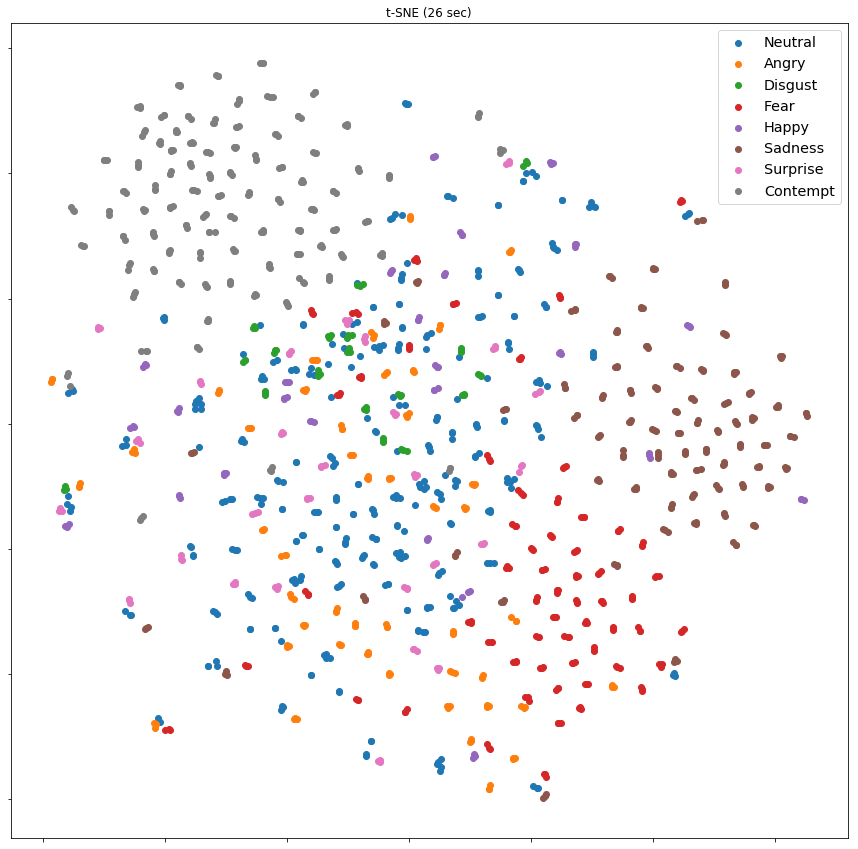

In [66]:
plt.figure(figsize=(15,15))
ax = plt.axes()

for emotion in emotion_index_dict:
    tmp_trans_data = trans_data[:,emotion_index_dict[emotion]]
    plt.scatter(tmp_trans_data[0], tmp_trans_data[1], label=emotion_list[emotion], cmap=plt.cm.rainbow)
plt.legend(fontsize='x-large')
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

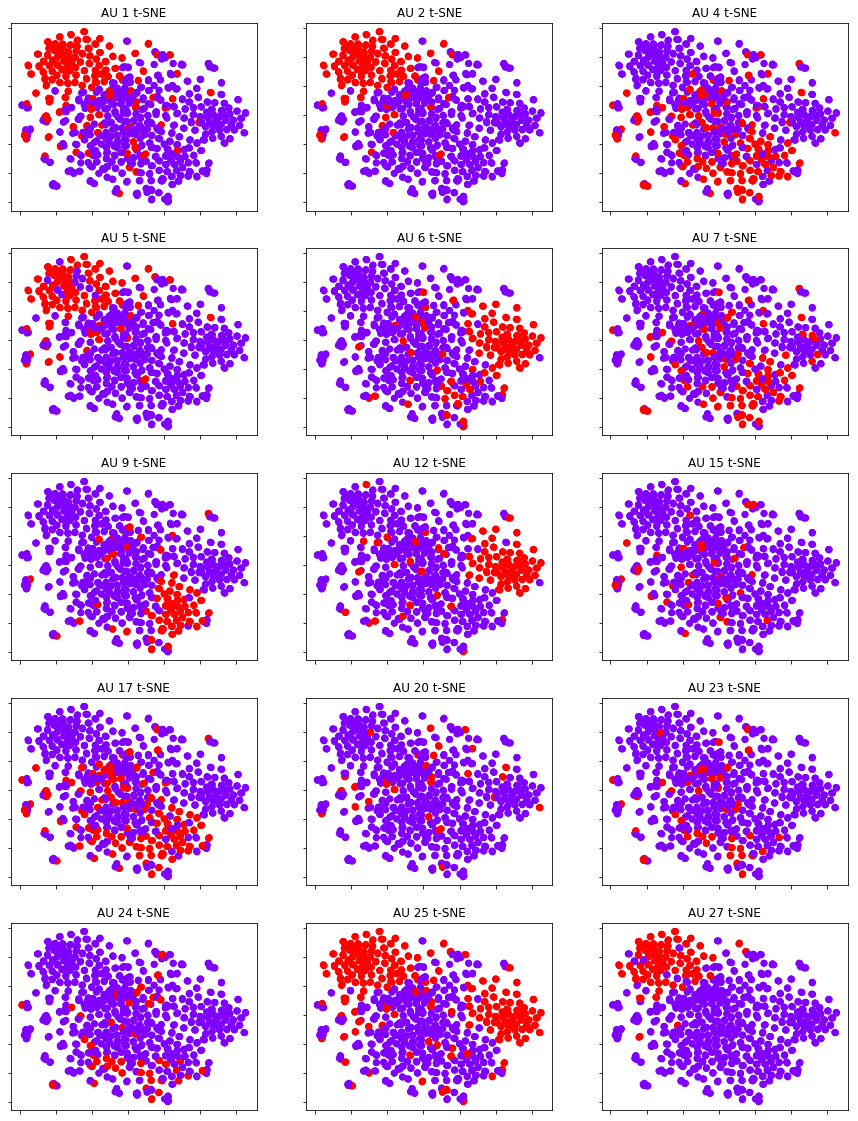

In [26]:
plt.figure(figsize=(15,20))
for i, au_code in enumerate(facs.columns):
    ax = plt.subplot(5,3,i+1)
    plt.scatter(trans_data[0], trans_data[1], c=facs[au_code], cmap=plt.cm.rainbow)
    plt.title("AU "+str(au_code)+" t-SNE")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

plt.show()